In [70]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [71]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [72]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm 
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [73]:
lables=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']


**Train test Split**

In [74]:
X_train=[]
Y_train=[]
image_size=150
for i in lables:
    folderPath=os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
              
        
        

In [75]:
for i in lables:
    folderPath=os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [76]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [77]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=100)
print(X_train.shape,Y_train.shape)


(3264, 150, 150, 3) (3264,)


In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=100)

In [79]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2611, 150, 150, 3) (653, 150, 150, 3) (2611,) (653,)


In [80]:
Y_train_new=[]
for i in Y_train:
    Y_train_new.append(labels.index(i))

Y_train=Y_train_new
Y_train=tf.keras.utils.to_categorical(Y_train)

In [81]:
Y_test_new=[]
for i in Y_test:
    Y_test_new.append(labels.index(i))

Y_test=Y_test_new
Y_test=tf.keras.utils.to_categorical(Y_test)

****Convolutional Neural Network****

In [86]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size,image_size,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.3))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [87]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 69, 69, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 33, 33, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,412,036 (5.39 MB)

 Trainable params: 1,412,036 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [92]:
history=model.fit(X_train,Y_train,epochs=30,validation_split=0.1)

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8839 - loss: 0.2873 - val_accuracy: 0.8817 - val_loss: 0.3311
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8975 - loss: 0.2806 - val_accuracy: 0.8550 - val_loss: 0.3227
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9061 - loss: 0.2459 - val_accuracy: 0.9084 - val_loss: 0.2490
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9002 - loss: 0.2408 - val_accuracy: 0.9389 - val_loss: 0.1973
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9227 - loss: 0.2161 - val_accuracy: 0.8740 - val_loss: 0.3091
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9113 - loss: 0.2513 - val_accuracy: 0.8626 - val_loss: 0.3625
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9133 - loss: 0.2412 - val_accuracy: 0.9237 - val_loss: 0.2057
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9280 - loss: 0.2007 - val_accuracy: 0.8359 - v

In [94]:
model.save('BrainTumor.h5')

In [99]:
history.history

{'accuracy': [0.881651759147644,
  0.8842060565948486,
  0.8944231867790222,
  0.904640257358551,
  0.9144316911697388,
  0.9037888646125793,
  0.91230309009552,
  0.919965922832489,
  0.9208173751831055,
  0.9191145300865173,
  0.9467858672142029,
  0.9233716726303101,
  0.9361430406570435,
  0.9501915574073792,
  0.9523201584815979,
  0.9446573257446289,
  0.954023003578186,
  0.9476373195648193,
  0.9591315388679504,
  0.9604086875915527,
  0.9650915265083313,
  0.9480630159378052,
  0.9599829912185669,
  0.954023003578186,
  0.9667943716049194,
  0.9689229726791382,
  0.9574286937713623,
  0.9544486999511719,
  0.9570029973983765,
  0.971477210521698],
 'loss': [0.2962391674518585,
  0.3027561604976654,
  0.27310383319854736,
  0.24214397370815277,
  0.2408996820449829,
  0.2669880986213684,
  0.2413577139377594,
  0.2159029096364975,
  0.20676948130130768,
  0.2120806723833084,
  0.16416260600090027,
  0.21327824890613556,
  0.17927610874176025,
  0.13664701581001282,
  0.12752266

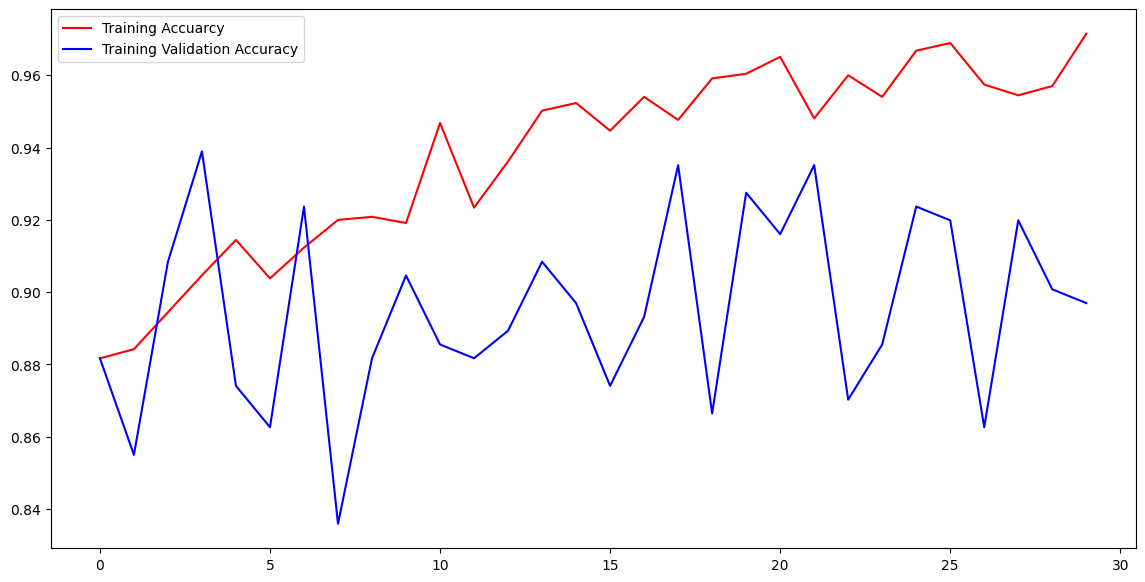

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuarcy')
plt.plot(epochs,val_acc,'b',label='Training Validation Accuracy')
plt.legend()
plt.show()

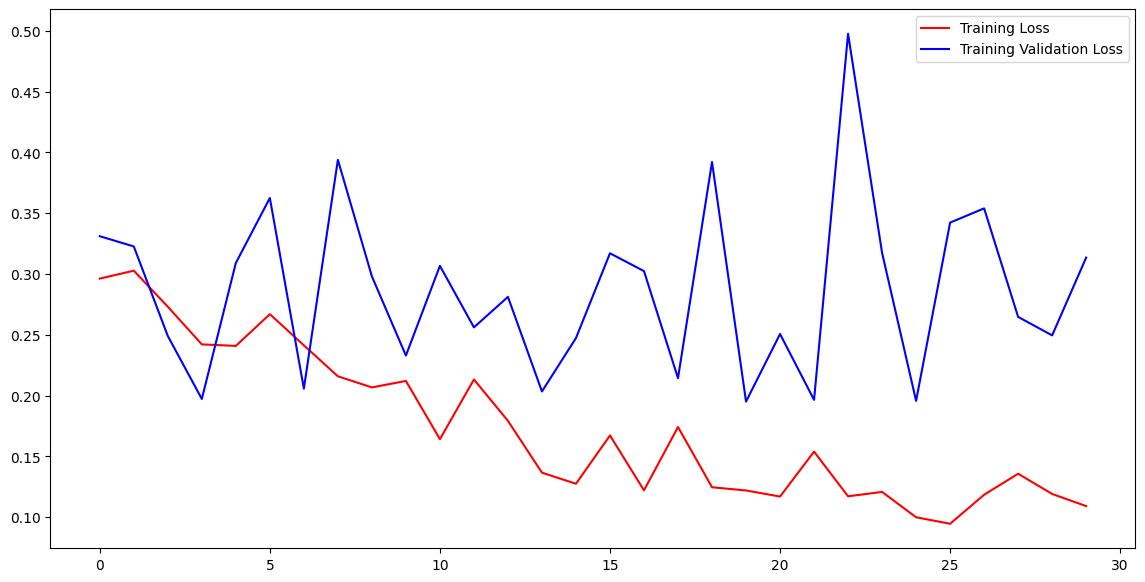

In [109]:

loss=history.history['loss']
val_loss=history.history['val_loss']
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Training Validation Loss')
plt.legend()
plt.show()

**Prediction**

In [110]:
y_pred=model.predict(X_test)
print(y_pred.shape)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
(653, 4)


In [121]:
from tensorflow.keras.preprocessing import image
path='/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(1).jpg'

In [122]:
img=cv2.imread(path)
img=cv2.resize(img,(image_size,image_size))
img_array=np.array(img)
img_arr=img_array.reshape(1,150,150,3)

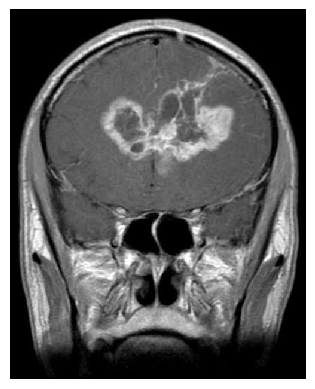

In [123]:
img=image.load_img(path)
plt.imshow(img,interpolation='nearest')
plt.axis('off')
plt.show()

In [124]:
values=model.predict(img_arr)
indices=np.argmax(values)

print('Prediction : ',labels[indices])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction :  glioma_tumor
